In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/list-of-best-selling-ps4-games/List of best-selling PlayStation 4 video games.csv


In [2]:
df = pd.read_csv('../input/list-of-best-selling-ps4-games/List of best-selling PlayStation 4 video games.csv')

df.head()

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20 million,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.5 million,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16 million,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.8 million,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10 million,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment


In [3]:
df['Copies sold'] = df['Copies sold'].str[0:2]
df['Copies sold'] = df['Copies sold'].astype('float')

df.head()

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20.0,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.0,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16.0,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.0,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10.0,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment


In [4]:
df.sort_values(['Copies sold'], ascending=[False])

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20.0,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.0,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16.0,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.0,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10.0,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment
5,Horizon Zero Dawn,10.0,"February 28, 2017",Action role-playing,Guerrilla Games,Sony Interactive Entertainment
6,The Last of Us Remastered,10.0,"July 29, 2014",Action-adventure survival horror,Naughty Dog,Sony Computer Entertainment
7,Ghost of Tsushima,9.0,"July 17, 2020",Action-adventure stealth,Sucker Punch Productions,Sony Interactive Entertainment
8,Star Wars Battlefront,8.0,"November 17, 2015",First-person shooter third-person shooter,EA DICE,Electronic Arts
9,Gran Turismo Sport,8.0,"October 17, 2017",Racing,Polyphony Digital,Sony Interactive Entertainment


In [5]:
df['Publisher(s)'] = df['Publisher(s)'].replace(['Sony Computer Entertainment','WW: Sony Interactive Entertainment JP: Koei Tecmo'], 'Sony Interactive Entertainment')

df.sort_values(['Copies sold'], ascending=[False])

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20.0,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.0,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16.0,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.0,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10.0,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment
5,Horizon Zero Dawn,10.0,"February 28, 2017",Action role-playing,Guerrilla Games,Sony Interactive Entertainment
6,The Last of Us Remastered,10.0,"July 29, 2014",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment
7,Ghost of Tsushima,9.0,"July 17, 2020",Action-adventure stealth,Sucker Punch Productions,Sony Interactive Entertainment
8,Star Wars Battlefront,8.0,"November 17, 2015",First-person shooter third-person shooter,EA DICE,Electronic Arts
9,Gran Turismo Sport,8.0,"October 17, 2017",Racing,Polyphony Digital,Sony Interactive Entertainment


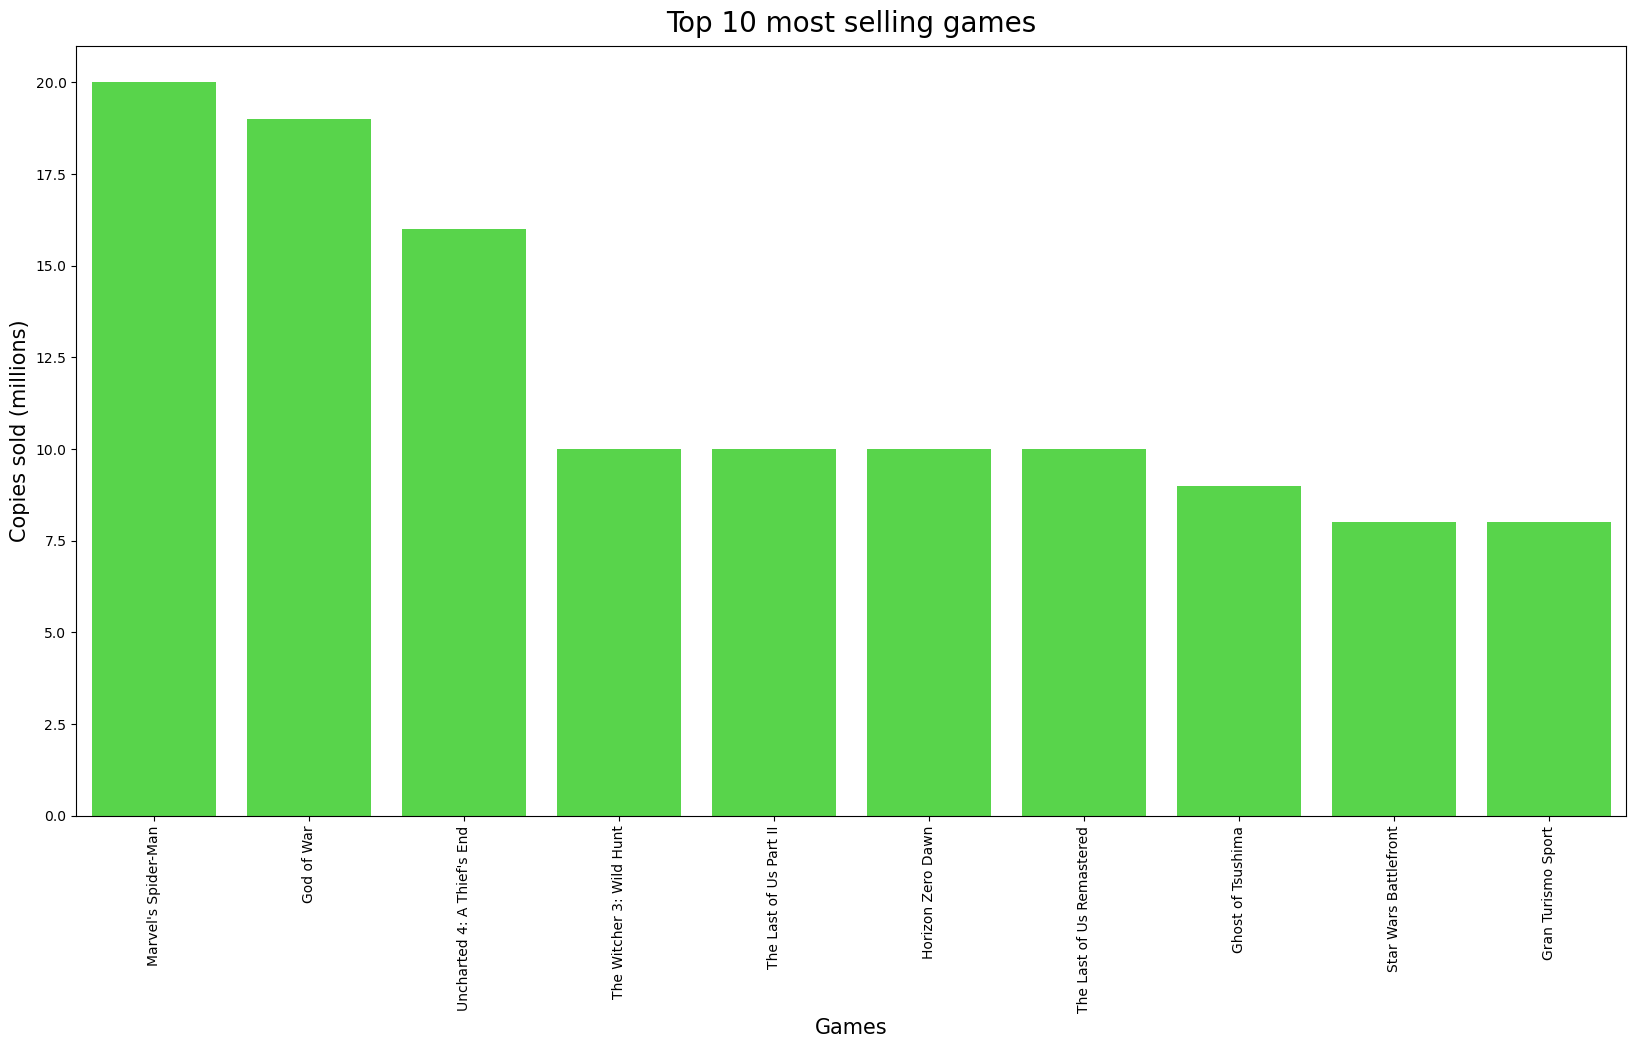

In [6]:
plt.figure(figsize=(20, 10))

a = sns.barplot(x=df['Game'].head(10), y=df['Copies sold'], color='#46eb34')
a.set_xticklabels(labels=df['Game'].head(10), rotation=90)
plt.ylabel("Copies sold (millions)", fontdict={"fontsize":15})
plt.xlabel("Games", fontdict={"fontsize":15})
plt.title('Top 10 most selling games',  fontdict={"fontsize":20}, pad=10)

plt.show()

In [7]:
genre = df['Genre(s)'].value_counts()
publisher = df['Publisher(s)'].value_counts()

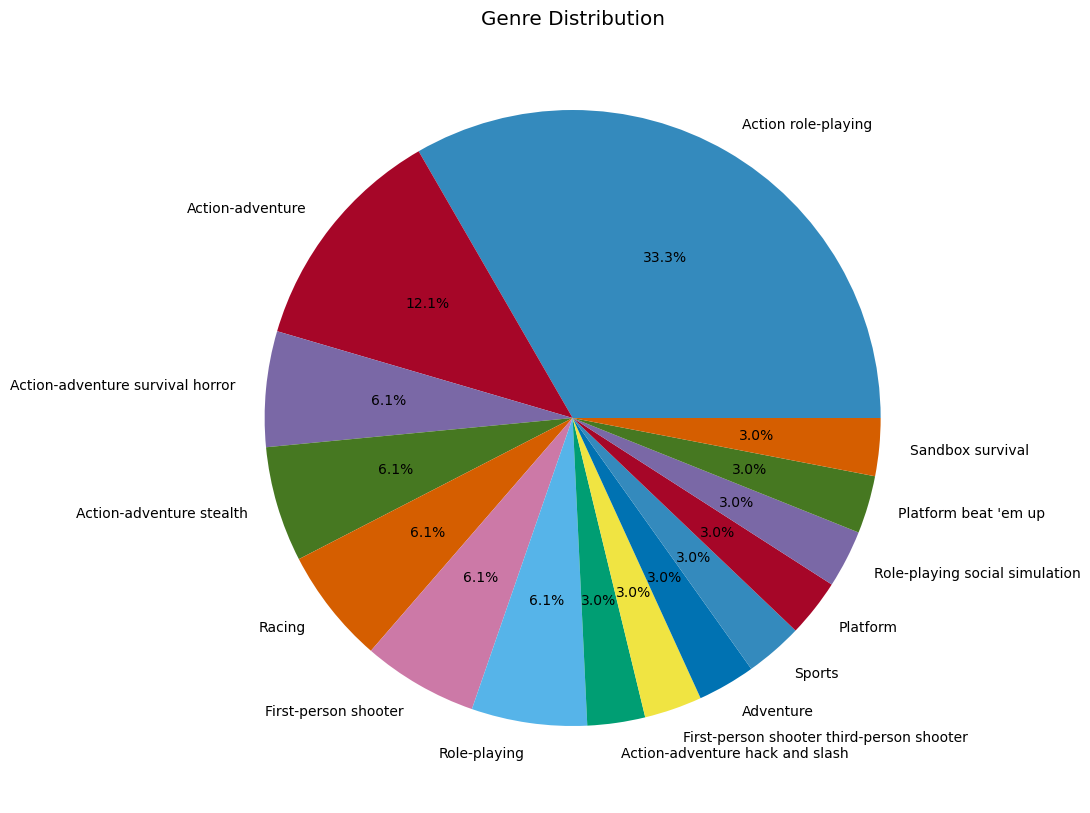

In [8]:
plt.figure(figsize=(20, 10))
plt.style.use('bmh')
plt.pie(genre, labels = genre.index, autopct='%.1f%%')
plt.title('Genre Distribution')
plt.show()

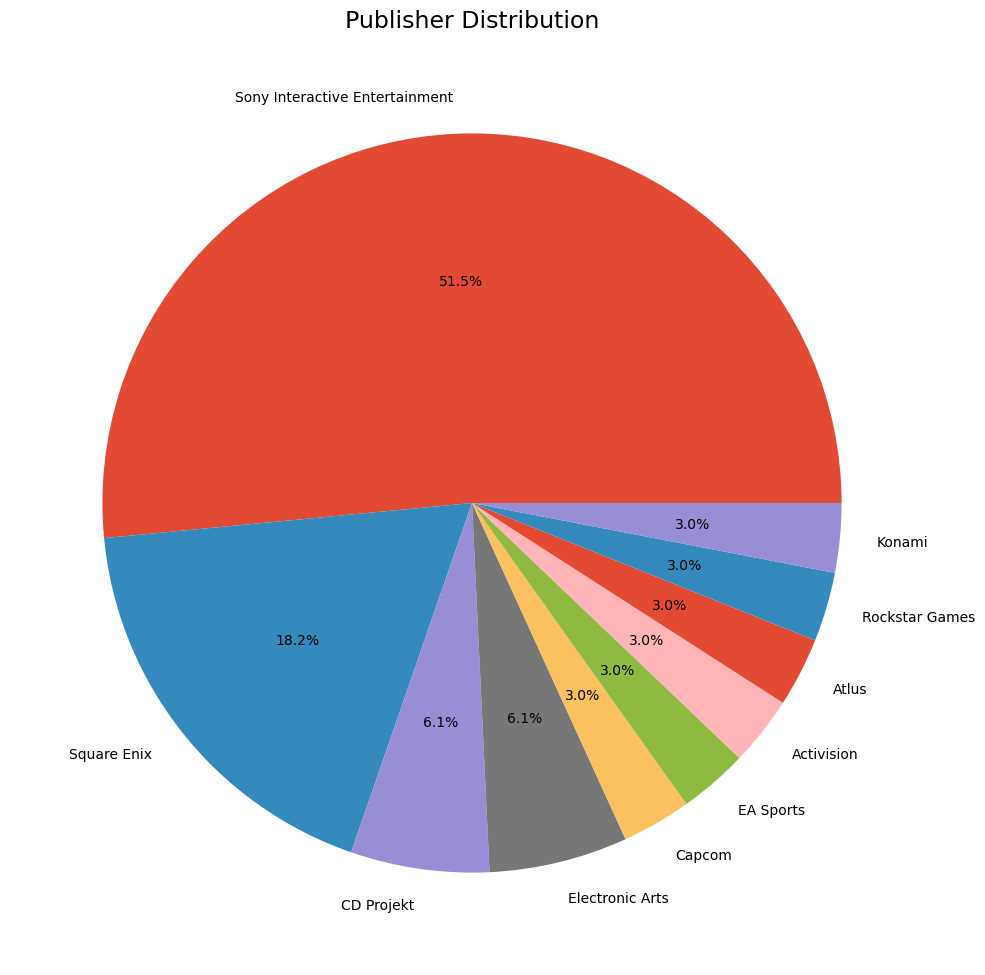

In [9]:
plt.figure(figsize=(24, 12))
plt.style.use('ggplot')
plt.pie(publisher, labels = publisher.index, autopct='%.1f%%')
plt.title('Publisher Distribution', fontdict={"fontsize":17}, pad=10)
plt.show()